<a href="https://colab.research.google.com/github/antoniosql/cursoml/blob/master/Laboratorios/Laboratorio_03_Analizando_los_datos_del_Titanic_Solucion_limpia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![SolidQ](https://www.solidq.com/wp-content/uploads/2015/06/Logo-SolidQ-Web.gif)
# Analizando los datos del hundimiento del Titanic


A lo largo de este laboratorio analizaremos el conjunto de datos del hundimiento del Titanic. En la [web de Kaggle](https://www.kaggle.com/c/titanic) podremos encontrar más información sobre las diferentes variables que contiene el dataset. 

En esta primera toma de contacto con el Conjunto de Datos nos centraremos en:

 1. Primeros pasos con el dataset
 2. Exploración del dataset y generación de estadísticas
 3. Presentación de resultados

### Cargando el conjunto de datos y obteniendo información básica:
El objetivo de esta sección es que nos familiarizemos con Pandas y seamos capaces de manipular el dataset a nuestro interés.

utilizaremos para este caso el fichero titanic_data.csv

In [0]:
import pandas
import numpy as np


input_file = 'titanic_data.csv'
separador = ","
dataset = pandas.read_csv(filepath_or_buffer=input_file, sep=separador)

# Creando el Modelo

En esta seción vamos a trabajar en la creación de un modelo que sirva para determinar si un pasajero va a sobrevivir o no. Lo primero que haremos será crear nuestro propio modelo en función de las conclusiones que hemos sacado, y después lo compararemos con un árbol de decision que entrenaremos con el dataset.

Lo primero que vamos a definir es el score accuracy para medir la calidad de nuestros resultados:



Lo siguiente que vamos a hacer es eliminar la columa 'Survived' del dataset y marcarla como etiqueta a predecir

In [0]:
# 'Survived' será nuestra etiqueta y el valor que queremos predecir:
y = dataset['Survived']
X = dataset.drop(['Survived','Name','Ticket','Cabin','Embarked','PassengerId'], axis = 1)

X['Sex'] = X['Sex'].apply(lambda x: 1. if x == 'female' else 0.)

# Representar las primeras 5 filas para comprobar los cambios

print X.head()

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=y)

# Definir el arbol de decision


In [0]:
X_test

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_features=3,max_depth=2)

In [0]:
def accuracy_score(truth, pred):
    """ Devuelve accuracy score comparando valores predichos (pred) contra reales (truth). """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predicciones tienen un accuracy de {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "El número de predicciones no es igual al numero de valores reales!"

In [69]:
# Entrenarlo con los datos de train
clf = clf.fit(X_train, y_train)

# Crear predicciones
predictions = clf.predict(X_test)

# Obtener resultado:
accuracy_score(y_test, predictions)

'Predicciones tienen un accuracy de 87.90%.'

In [65]:
print('R-squared test score: {:.3f}'
     .format(clf.score(X_test, y_test)))

R-squared test score: 0.879


Representamos el árbol de decisión

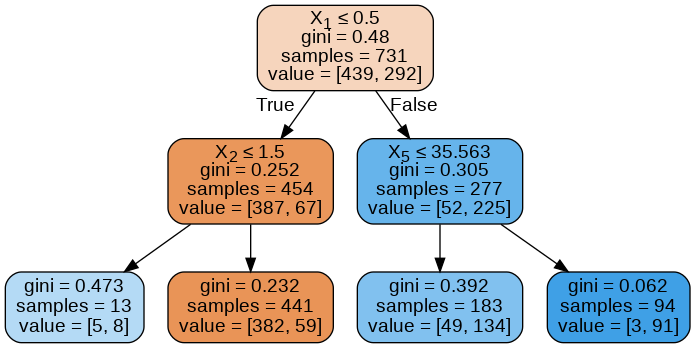

In [73]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Podríamos mejorar el siguiente modelo?